In [1]:

import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from plotnine import *


from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.model_selection import train_test_split

from sklearn import metrics 
from sklearn.preprocessing import StandardScaler #Z-score variables

from sklearn.model_selection import train_test_split # simple TT split cv
from sklearn.model_selection import KFold # k-fold cv
from sklearn.model_selection import LeaveOneOut #LOO cv
from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Explore Data

In [2]:
gpa = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/CCfraud.csv")

#(ggplot(gpa, aes()) + geom_bar())

# Build Model

In [3]:
X = gpa[["home","amount","cashBack"]]
y = gpa["fraud"]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
zscore = StandardScaler()
zscore.fit(X_train[["amount"]])

X_train["amount"] = zscore.transform(X_train[["amount"]])
X_test["amount"] = zscore.transform(X_test[["amount"]])

tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

# Evaluate Model

In [4]:
y_pred = tree.predict(X_test)

accuracy_score(y_pred, y_test)

0.775

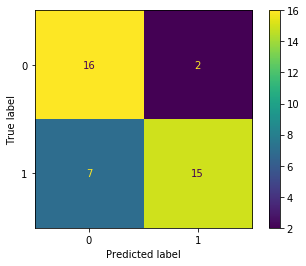

In [5]:
plot_confusion_matrix(tree,X_test,y_test)

# Looking more into our tree and playing around

In [6]:
tree.get_depth()

9

In [7]:
tree.get_n_leaves()

29

In [8]:
tree = DecisionTreeClassifier(max_depth = 5)
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [9]:
y_pred = tree.predict(X_test)

accuracy_score(y_pred, y_test)

0.8

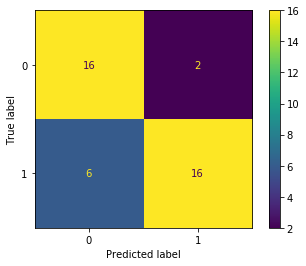

In [10]:
plot_confusion_matrix(tree,X_test,y_test)


In [11]:
tree.get_depth()


5

In [12]:
tree.feature_importances_


array([0.05752412, 0.85824532, 0.08423056])

In [13]:
heart = pd.read_csv("https://raw.githubusercontent.com/cmparlettpelleriti/CPSC392ParlettPelleriti/master/Data/heart.csv")
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


[0.7236842105263158, 0.6842105263157895, 0.5921052631578947, 0.56]
0.64
[15, 13, 18, 13]


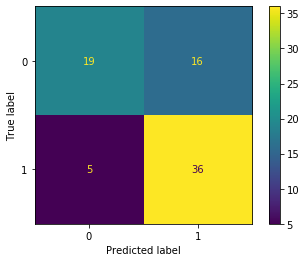

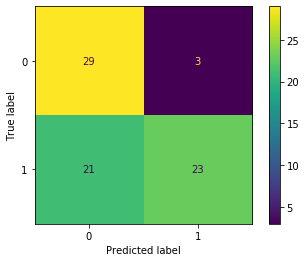

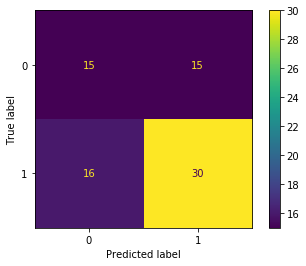

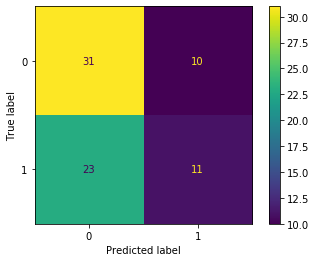

In [14]:
predictors = ["sex", "age", "restecg", "chol"]

X = heart[predictors]
y = heart["target"]

kf = KFold(4, shuffle = True)

acc = []
depth = []
for train, test in kf.split(X):
    X_train = X.iloc[train,]
    X_test = X.iloc[test,]
    y_train = y[train]
    y_test = y[test]
    
    z = StandardScaler()
    X_train[["age", "chol"]] = z.fit_transform(X_train[["age", "chol"]])
    
    tree = DecisionTreeClassifier()
    tree.fit(X_train,y_train)

    acc.append(tree.score(X_test,y_test))
    depth.append(tree.get_depth())
    
    plot_confusion_matrix(tree,X_test,y_test)

print(acc)
print(np.mean(acc))
print(depth)